<img src='assets/flu_shot.png' width=900>

## Постановка задачи
В этом домашнем задании мы поучаствуем с вами в настоящем соревновании по анализу данных. Соревнование открытое -- всегда сможете вернуться к своему результату, чтобы попробовать его улучшить.

Во всех подробностях ознакомится с соревнованием можно по [**этой ссылке**](https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/).

В этом соревновании совместно с Национальным центром статистики здравоохранения США была собрана база данных, в которой респондентов опрашивали по телефону, вакинировались ли они от сезонного гриппа и от гриппа H1N1 ("свинной грипп"). 

По данным того, как отвечали респонденты, необходимо будет предсказать **две** целевые переменные:

- `h1n1_vaccine` - вакцинировался ли респондент от гриппа H1N1
- `seasonal_vaccine` - вакционировался ли респондент от сезонного гриппа.
Каждая из этих меток может принимать только одного из значений, либо 0 = "нет", либо 1 = "да" (некоторые респонденты могли  вакцинироваться два раза, некоторые только один раз, а некоторые ни одного). Задача классификации, когда необходимо прдсказывать сразу несколько меток класса называется "мультилейбловой классификацией".

Подробное описание задачи представлено на [этой странице](https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/#features_list).

## План действий:

Во всех прошлых домашних заданиях я давал подробные инструкции по тому, что именно и в какой последовательности делать. Это домашнее задание будет отличаться тем, что ниже будет приведён только общий план действий. А реализацию кода я оставляю за вами. Добавляйте необходимое количество ячеек ниже по пунктам.

### Список обязательных действий

# Загрузка и первичная подготовка данных
1. Присоединитесь к соревнованию и скачайте тренировочную и тестовую выборки с официального сайта (1 балл).

2. Загрузите данные тренировочной выборки в датафрейм, разделите матрицу предикторов и целевые переменные на `X` и `Y` (1 балл).

3.  Обучающую часть выборки (для которой известны истинные метки классов) разделите на тренировочную и тестовую часть в соотношении 80:20 (1 балл).


`### Do not modify this cell`

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [50]:
data_features_path = 'data/training_set_features.csv'
data_labels_path = 'data/training_set_labels.csv'
check_data_path = 'data/test_set_features.csv'

X, y = pd.read_csv(data_features_path), pd.read_csv(data_labels_path)
X_check = pd.read_csv(check_data_path)
X.shape, X_check.shape

((26707, 36), (26708, 36))

Посмотрим на пропущенные значения

In [3]:
X.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

Отдельно посмотрим на 3 предиктора: health_insurance, employment_industry и employment_occupation, так как в них пропусков больше всего - примерно половина датасета.

In [4]:
X['health_insurance'].value_counts(dropna=False)

health_insurance
1.0    12697
NaN    12274
0.0     1736
Name: count, dtype: int64

In [5]:
X['employment_industry'].value_counts(dropna=False)

employment_industry
NaN         13330
fcxhlnwr     2468
wxleyezf     1804
ldnlellj     1231
pxcmvdjn     1037
atmlpfrs      926
arjwrbjb      871
xicduogh      851
mfikgejo      614
vjjrobsf      527
rucpziij      523
xqicxuve      511
saaquncn      338
cfqqtusy      325
nduyfdeo      286
mcubkhph      275
wlfvacwt      215
dotnnunm      201
haxffmxo      148
msuufmds      124
phxvnwax       89
qnlwzans       13
Name: count, dtype: int64

In [6]:
X['employment_occupation'].value_counts(dropna=False)

employment_occupation
NaN         13470
xtkaffoo     1778
mxkfnird     1509
emcorrxb     1270
cmhcxjea     1247
xgwztkwe     1082
hfxkjkmi      766
qxajmpny      548
xqwwgdyp      485
kldqjyjy      469
uqqtjvyb      452
tfqavkke      388
ukymxvdu      372
vlluhbov      354
oijqvulv      344
ccgxvspp      341
bxpfxfdn      331
haliazsg      296
rcertsgn      276
xzmlyyjv      248
dlvbwzss      227
hodpvpew      208
dcjcmpih      148
pvmttkik       98
Name: count, dtype: int64

Предикторы employment_occupation и employment_industry имеют много различных значений. Нет чёткой интуиции, каким образом лучше всего заполнять для них столько пропущенных значений. В таком случае можно, например, попробовать заполнить пропущенные значения "равномерно", то есть вместо пропусков вписать значения в тех же пропорциях, как они даны в датасете X, чтобы распределение не сильно поменялось; или заполнить каким-то другим способом. Даже если мы как-то сможем заполнить эти пропуски, то в дальнейшем эти категориальные признаки придётся переводить в численные с помощью OneHotEncoding, а так как значений у этих признаков достаточно много, то матрица будет сильно разреженной. Поэтому в своей реализации я просто удалю эти два столбца.

Что касается предиктора health_insurance, то насчёт заполнения его пропусков есть следующая интуиция: можно посмотреть на его взаимосвязь с предиктором income_poverty и присвоить 0 тем людям, чей доход ниже черты бедности, и 1 тем, чей доход выше этого уровня. (так как исследование проводилось в США, где мед. страховка платная, то кажется, что человек с доходами ниже минимума скорее не имеет возможности купить страховку)

<Axes: ylabel='income_poverty'>

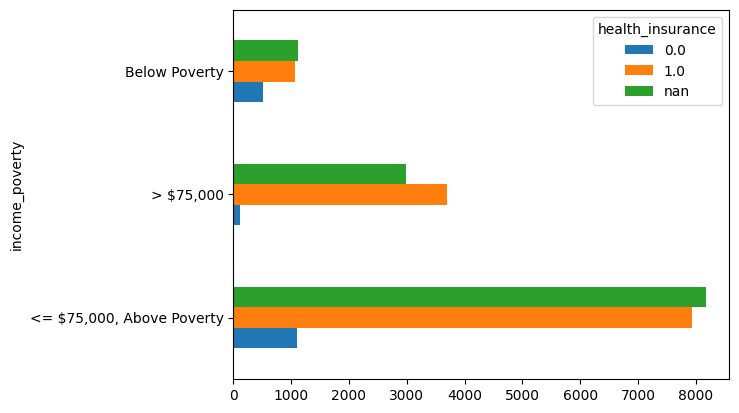

In [7]:
X['income_poverty'] = X['income_poverty'].fillna(X['income_poverty'].value_counts().index[0]) # заполняю наиболее часто встречающимся
X[['income_poverty', 'health_insurance']].value_counts(dropna=False).unstack('health_insurance').plot.barh()

In [8]:
def filler(row):
    h_i, i_p = row
    if np.isnan(h_i):
        return 0.0 if i_p=='Below Poverty' else 1.0
    return h_i

X['health_insurance'] = X[['health_insurance', 'income_poverty']].apply(filler, axis=1)
X = X.drop(columns=['employment_occupation', 'employment_industry'])

Все остальные пропуски заполним просто наиболее часто встречающимся элементом в соответствующем столбце

In [9]:
X = X.fillna(X.mode().iloc[0])
X.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)
X_train.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
22542,22542,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,oxchjgsf,Non-MSA,3.0,1.0
15778,15778,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",0.0,1.0
15152,15152,3.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Black,Male,Below Poverty,Not Married,Rent,Employed,fpwskwrf,"MSA, Principle City",1.0,0.0
14690,14690,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Black,Female,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,Non-MSA,0.0,0.0
13249,13249,3.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Rent,Not in Labor Force,fpwskwrf,"MSA, Not Principle City",0.0,0.0


# Исследовательский анализ данных

4. Проведите первичный анализ данных для тренировочной части выборки (3 балла):
    - исследуйте, сбалансированы ли целевые переменные;
    - какие предикторы связаны с целевой переменной;
    
    Кстати, неплохой Exploratory data analysis приведён в данном [**блоге DrivenData**](https://drivendata.co/blog/predict-flu-vaccine-data-benchmark/)


`### Do not modify this cell`

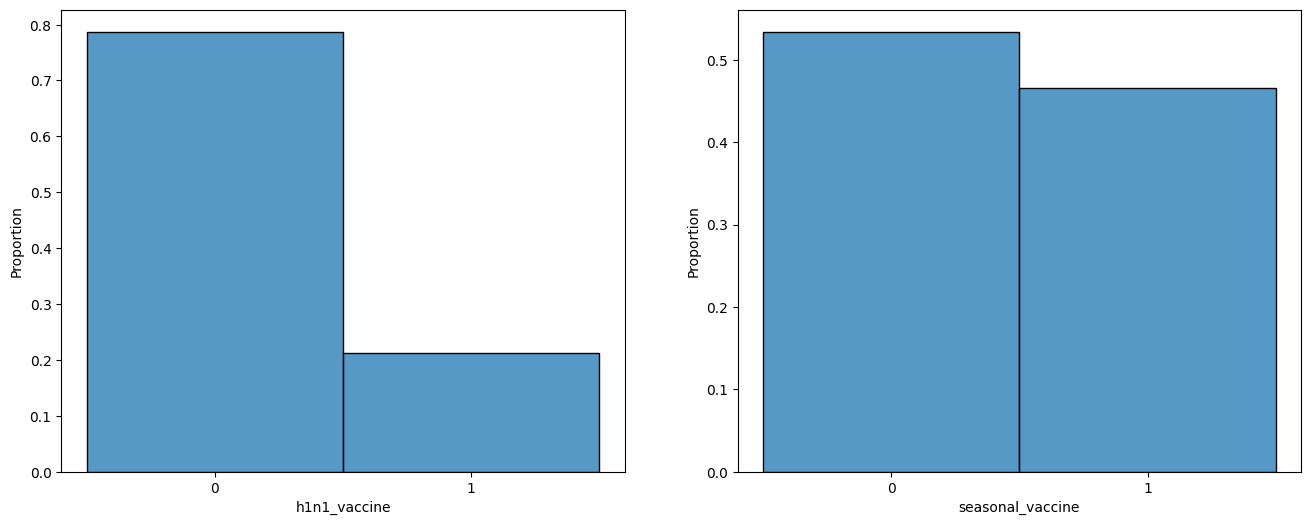

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(y['h1n1_vaccine'], ax=ax1, discrete=True, stat='proportion')
ax1.set_xticks([0, 1])
sns.histplot(y['seasonal_vaccine'], ax=ax2, discrete=True, stat='proportion')
ax2.set_xticks([0, 1])

Видно, что переменная h1n1_vaccine не сбалансирована, а seasonal_vaccine сбалансирована

Посмотрим, насколько эти две переменные скоррелированы. Скорее всего, их коэф. корреляции будет положительным, так как логично предположить, что во-первых, среди людей, сделавших вакцину от гриппа, будет доля тех, кто вакцинировался и H1N1. Во-вторых, если человек не вакцинировался от гриппа, то скорее всего, он и не делал вакцину H1N1. Такие выводы я сделал на основании того, что вакцина от гриппа больше "на слуху" у среднестатистического человека, чем H1N1.

In [12]:
y['h1n1_vaccine'].corr(y['seasonal_vaccine'])

0.37714265306144684

In [13]:
data = pd.concat((X, y.drop(columns='respondent_id')), axis=1)
data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0,0


In [14]:
def count_df(feature, df):
    labels = ['h1n1_vaccine', 'seasonal_vaccine']
    dfs = []
    for label in labels:
        dff = df[[feature, label]].value_counts().unstack(label)
        normalized = dff.div(dff.sum(axis=1), axis=0)
        dfs.append(normalized)
    return dfs

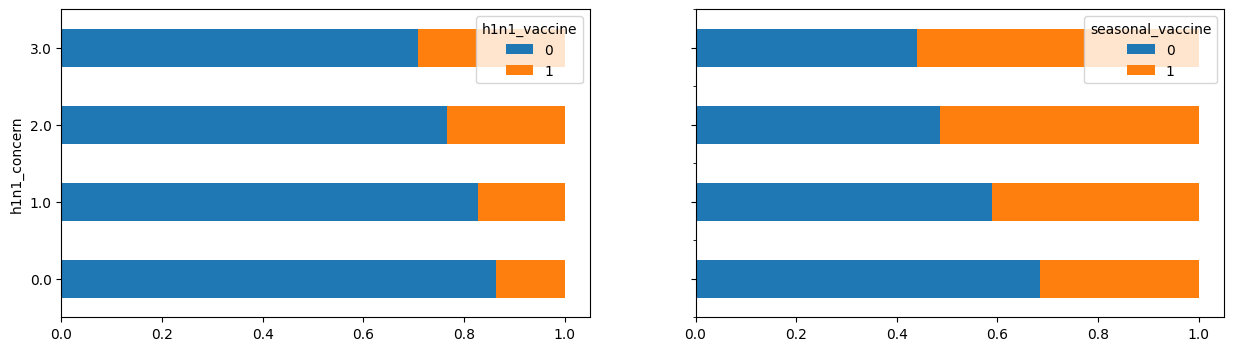

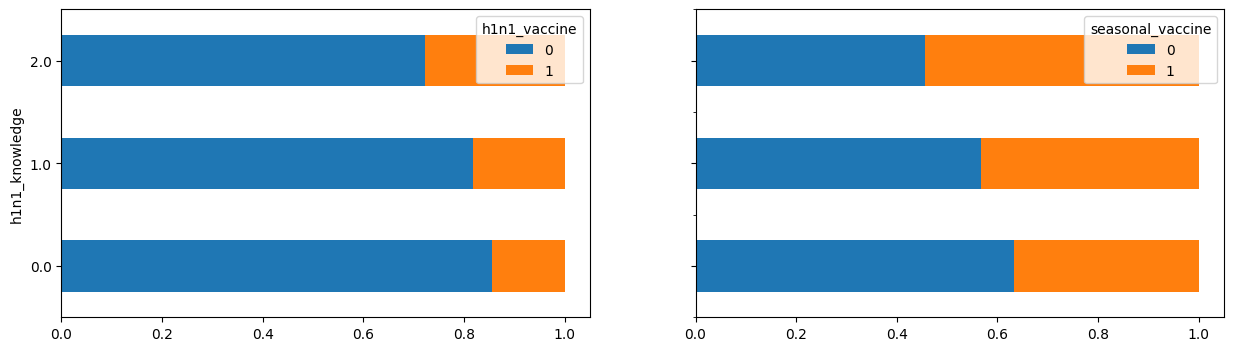

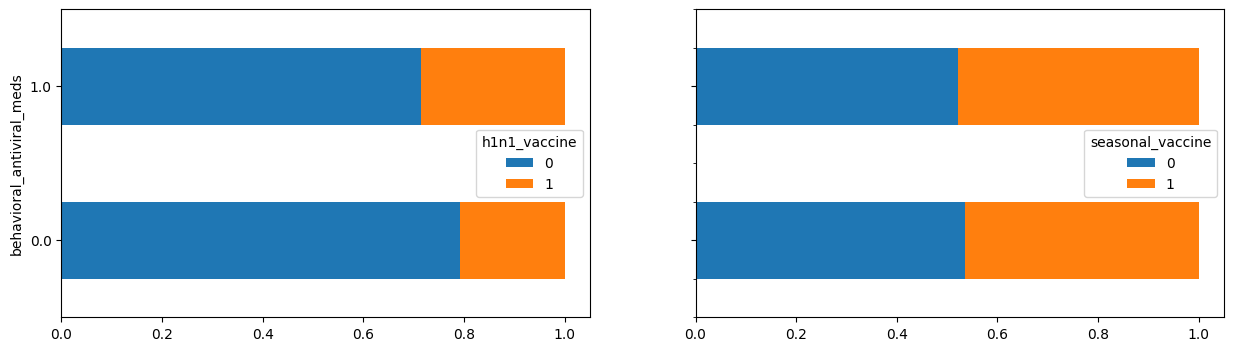

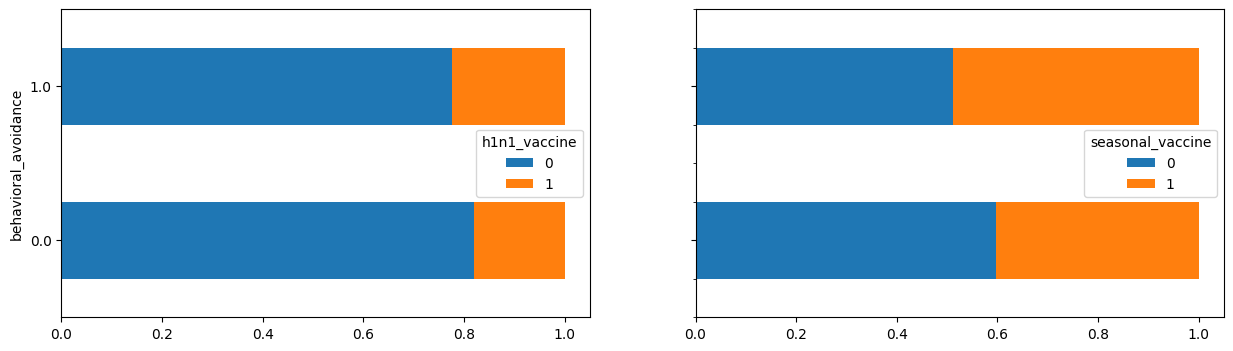

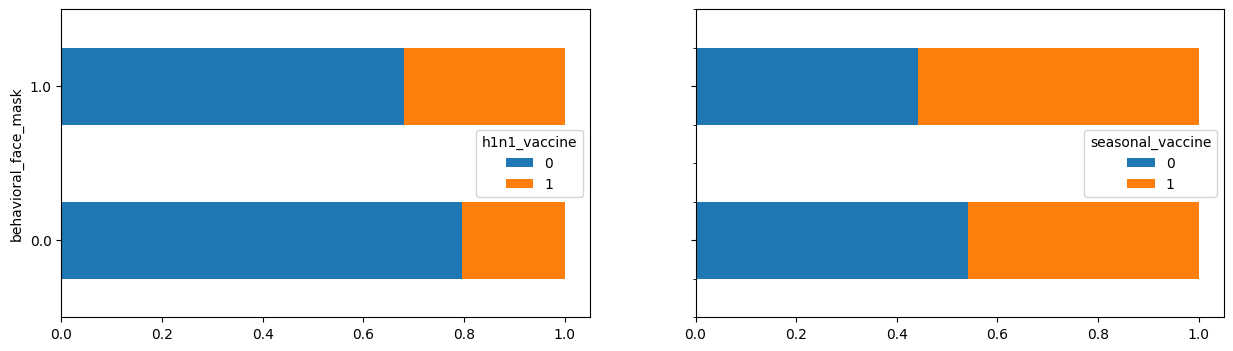

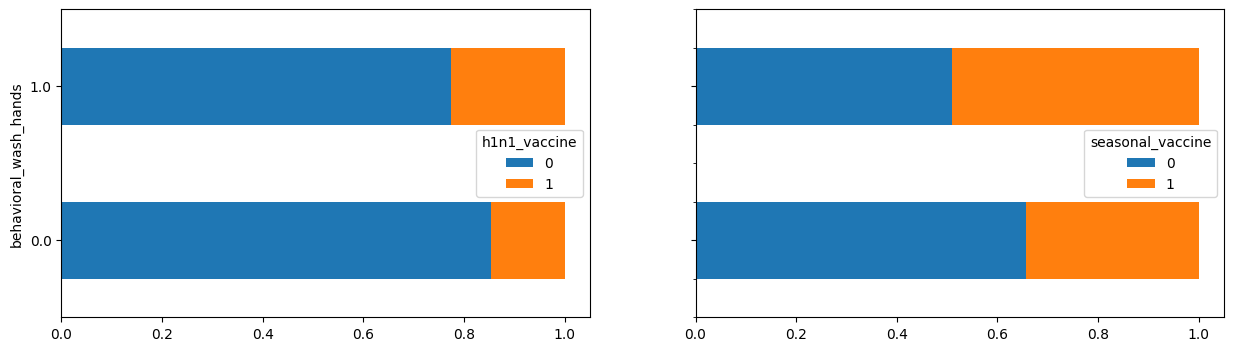

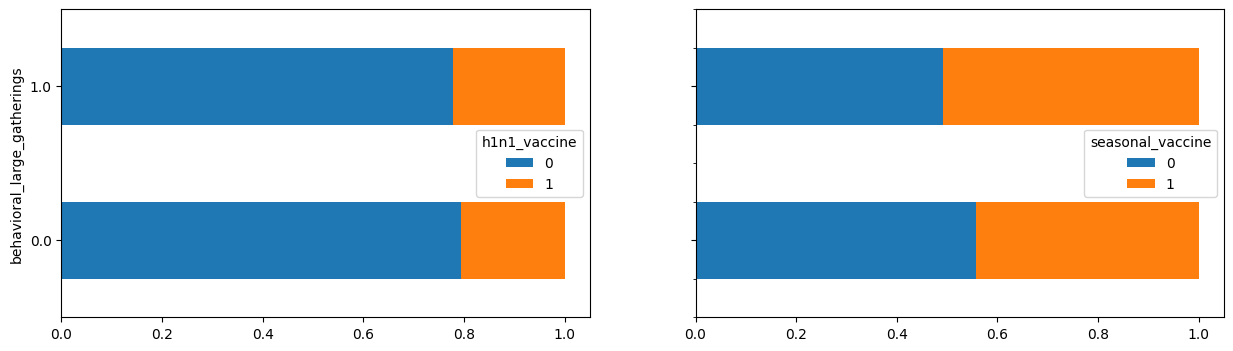

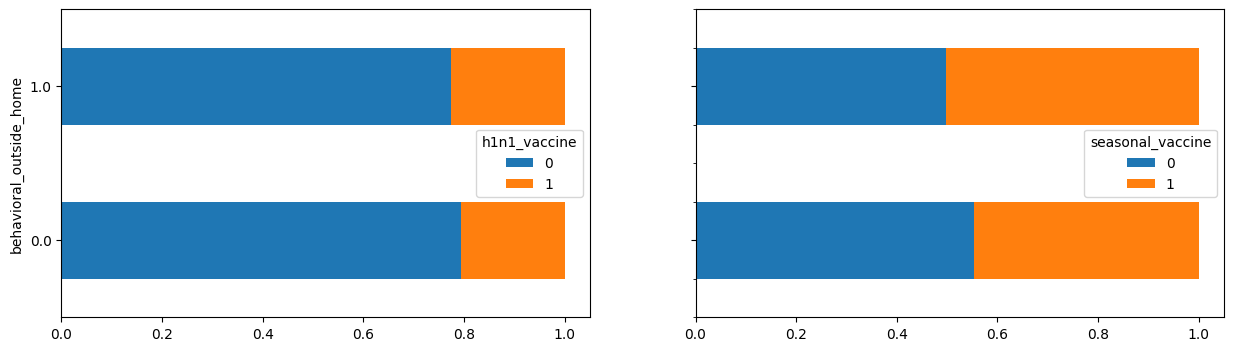

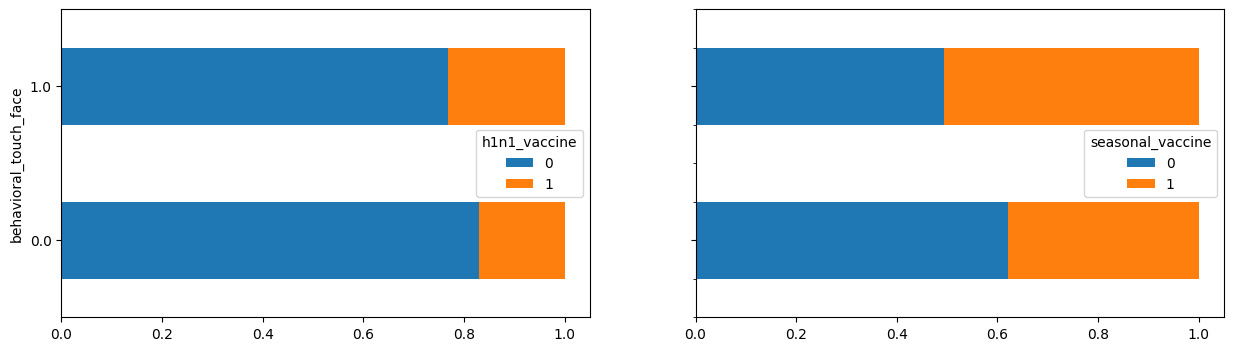

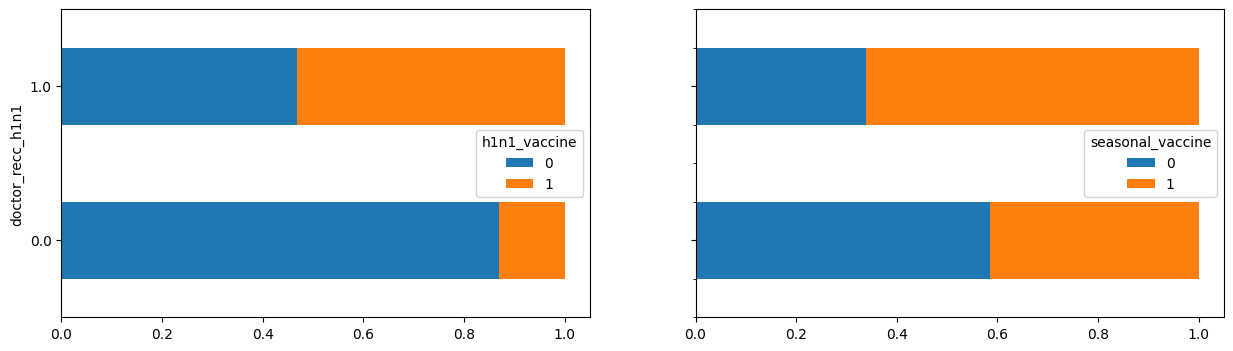

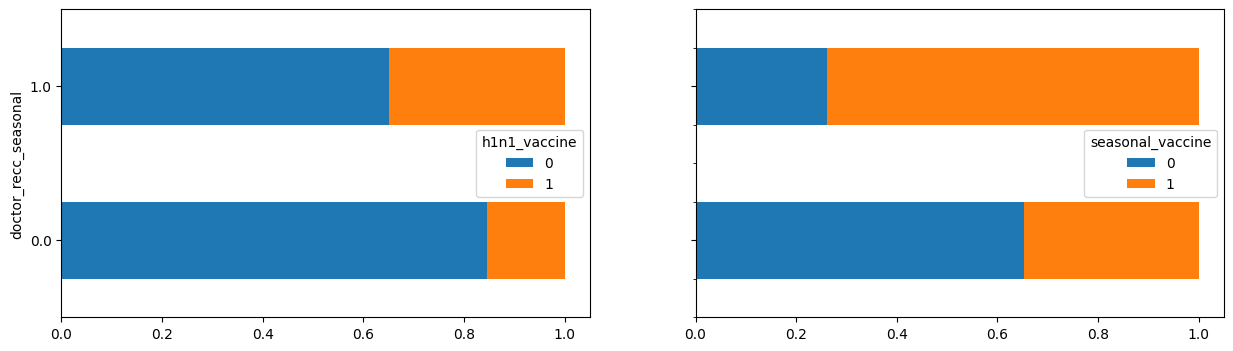

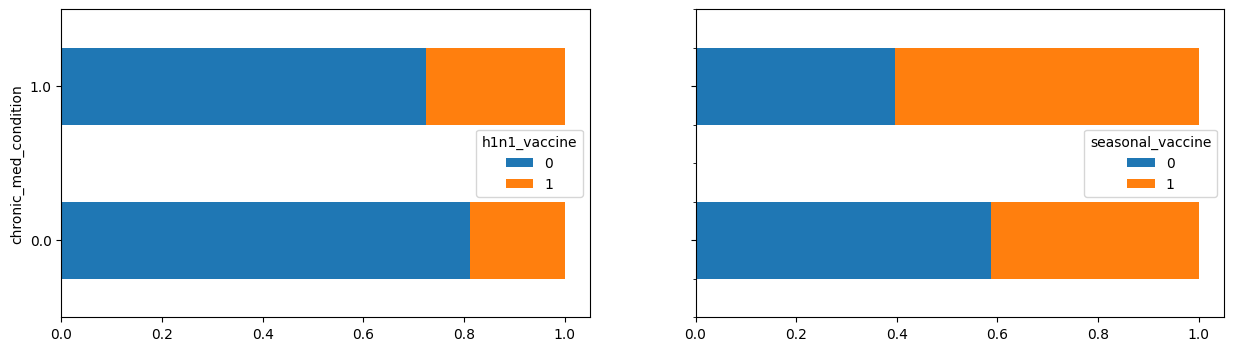

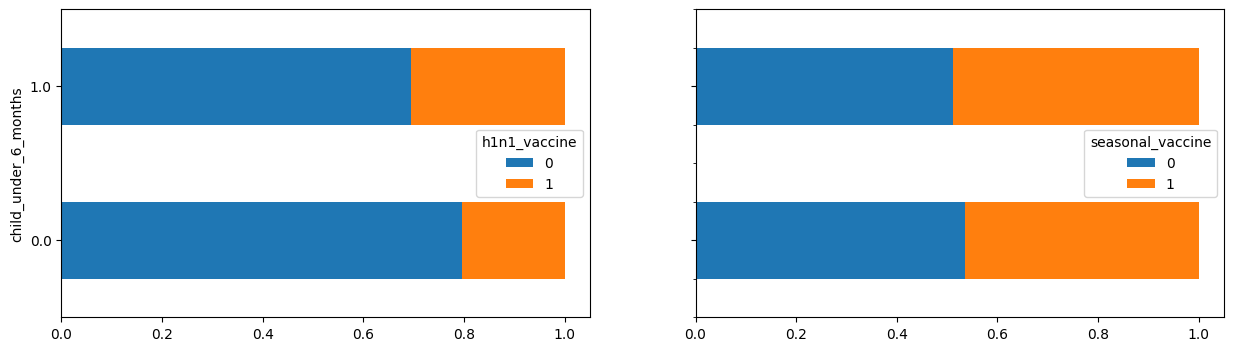

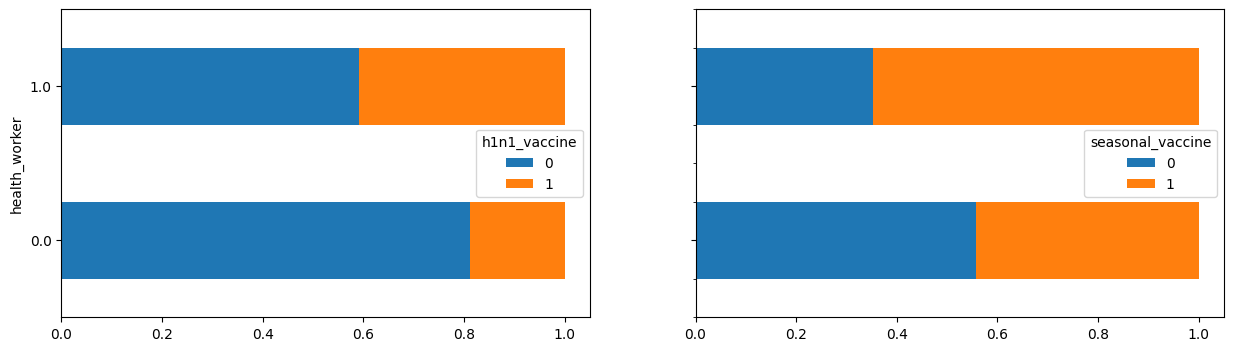

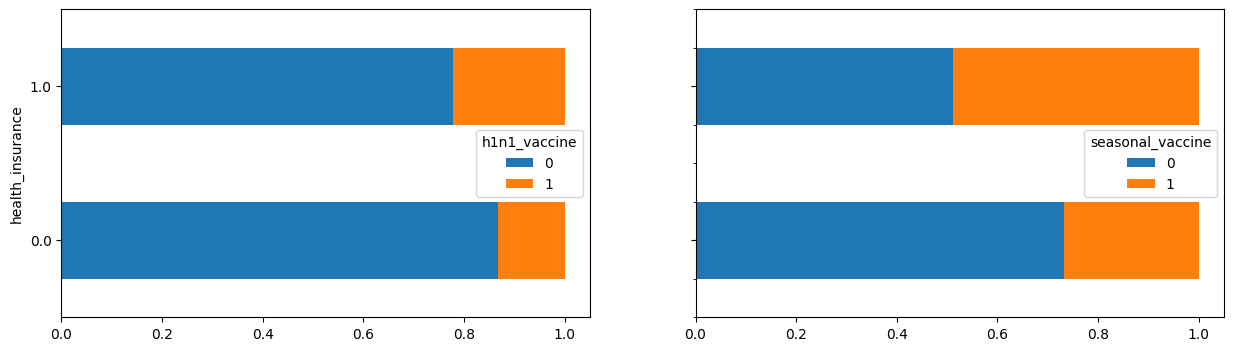

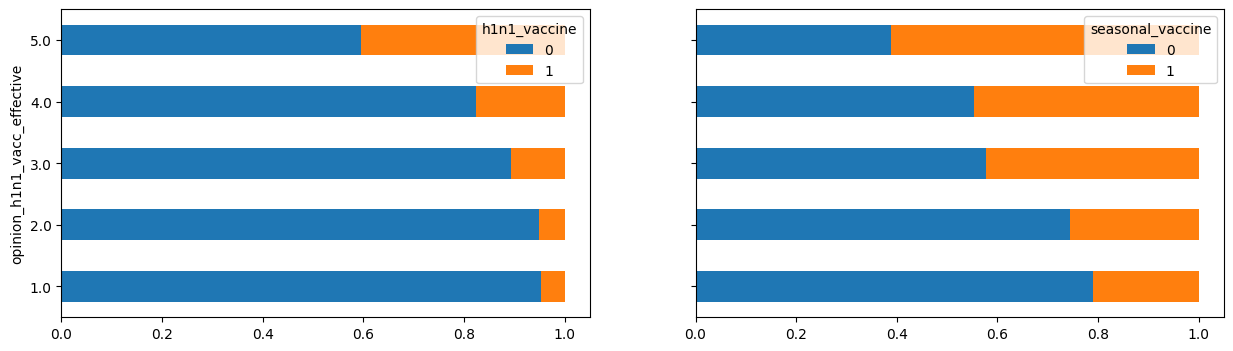

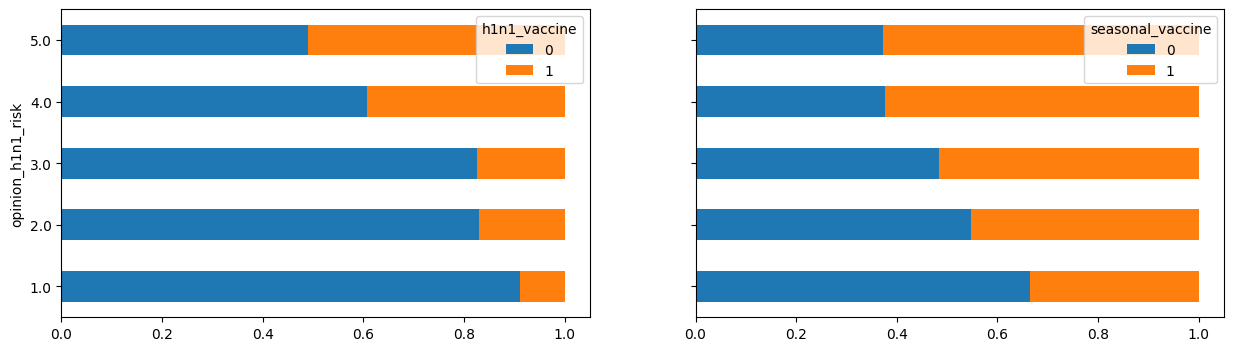

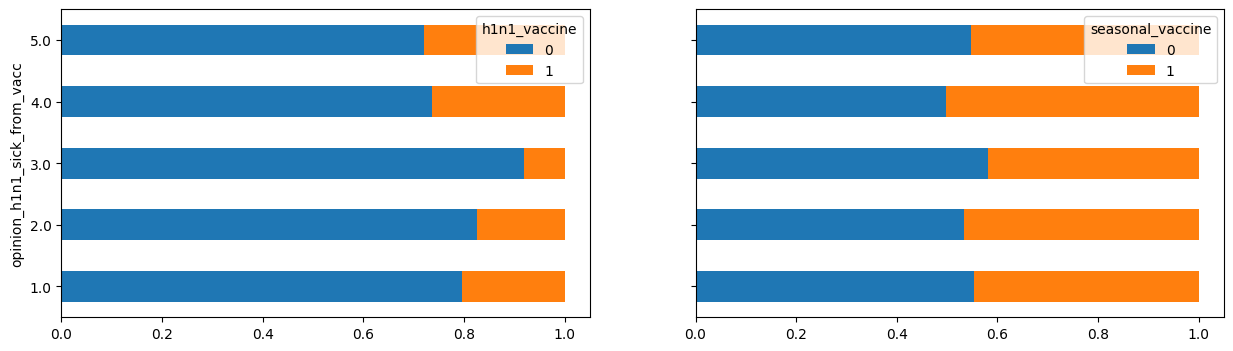

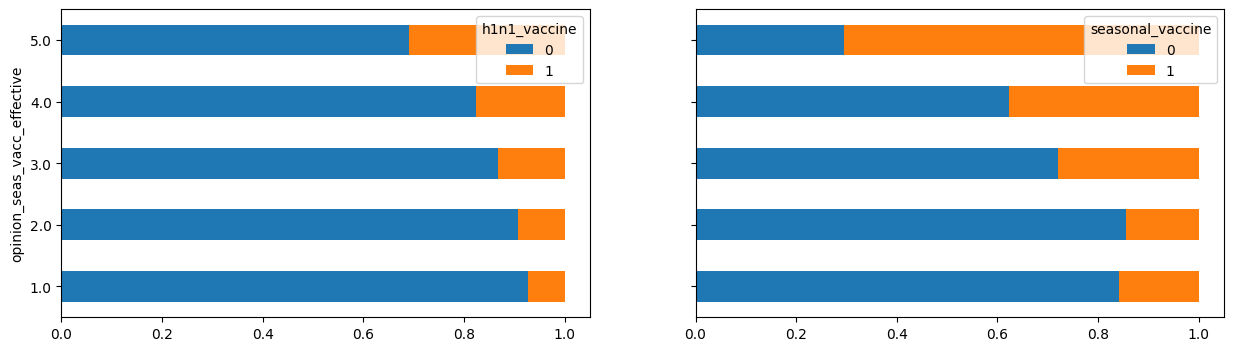

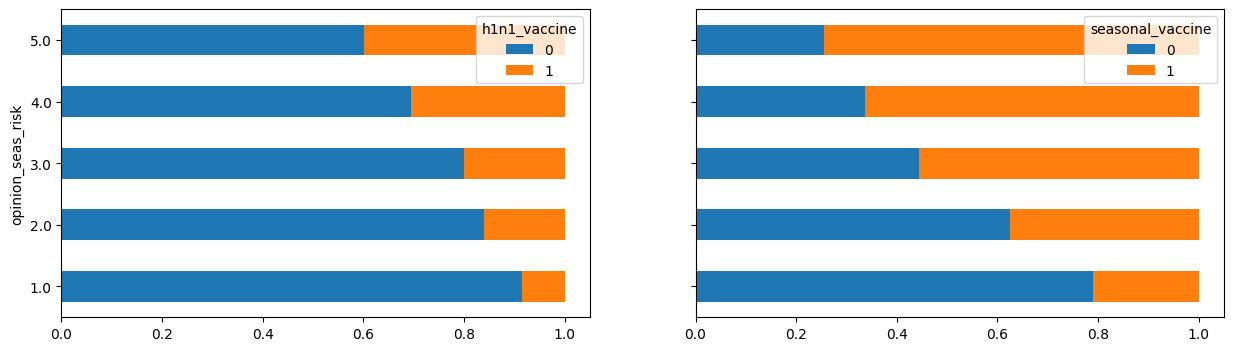

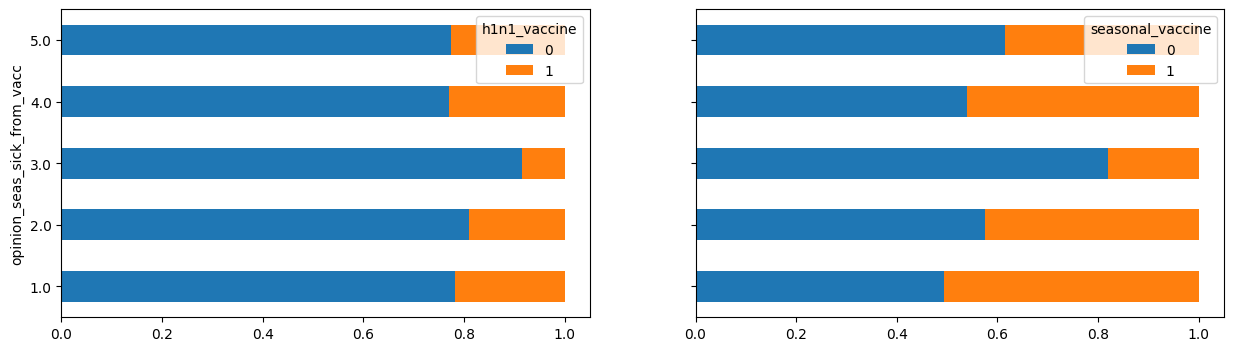

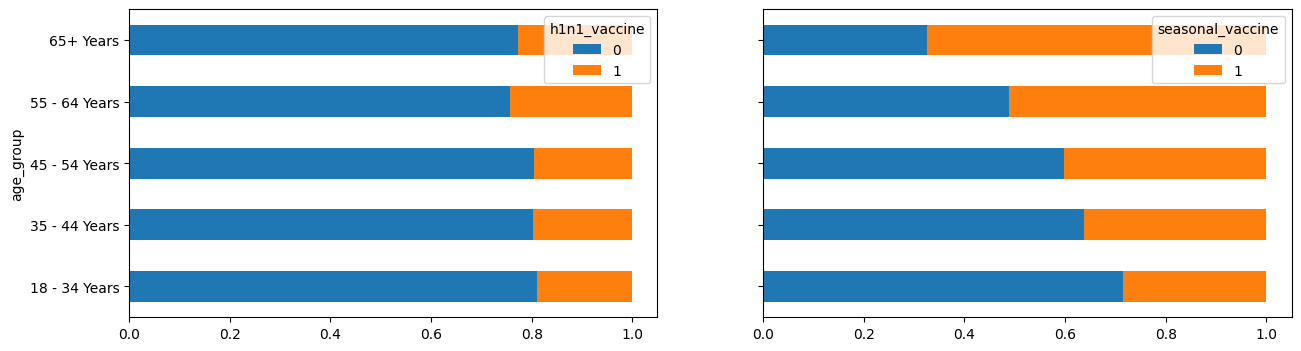

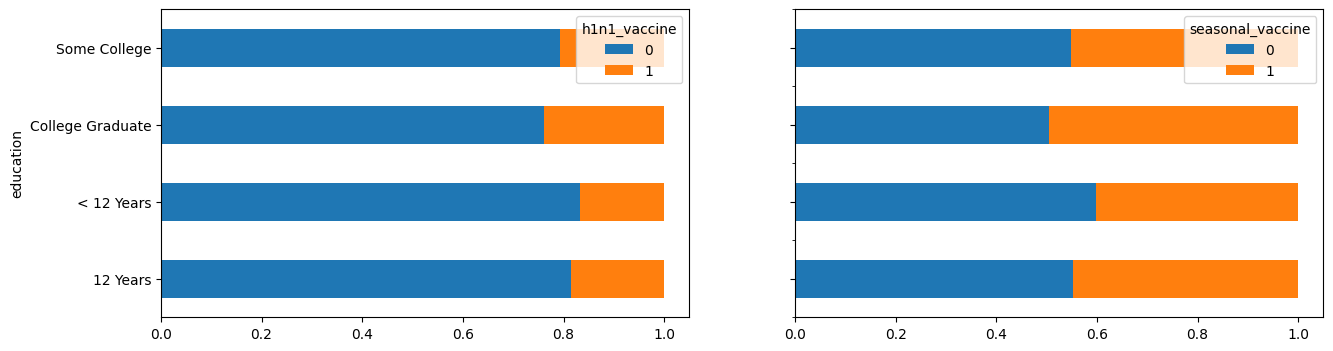

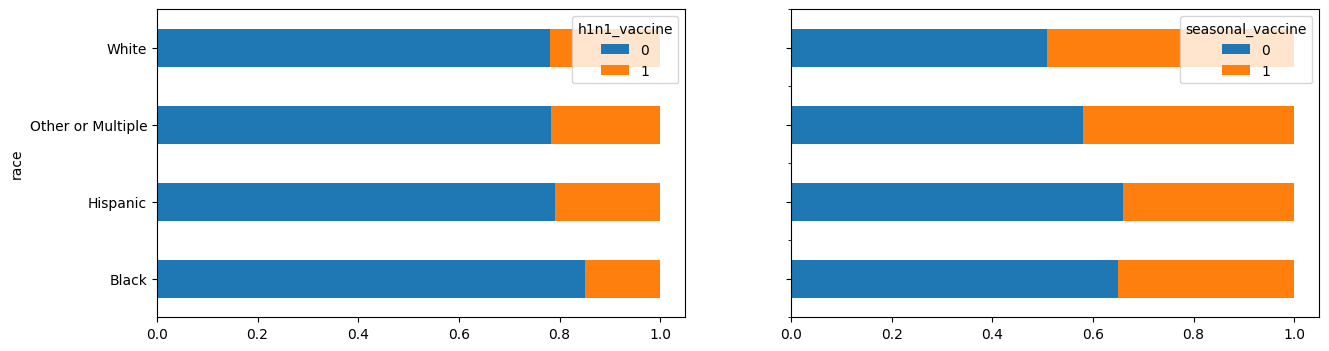

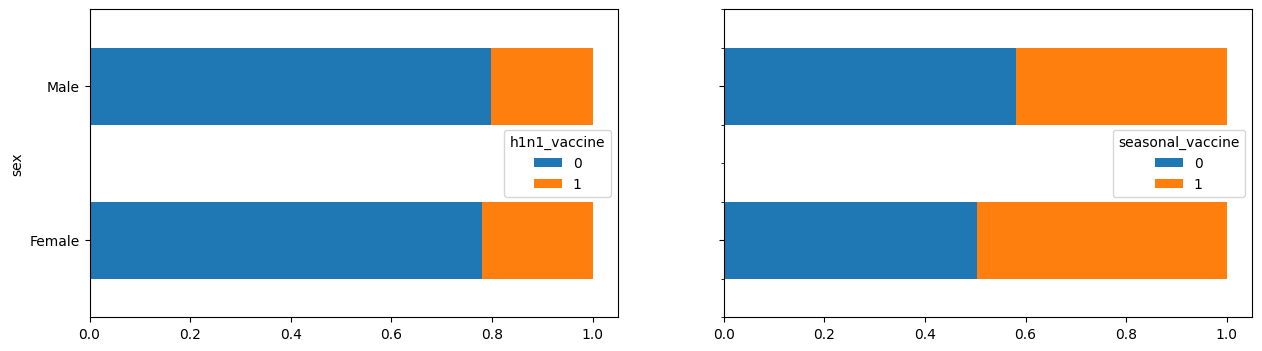

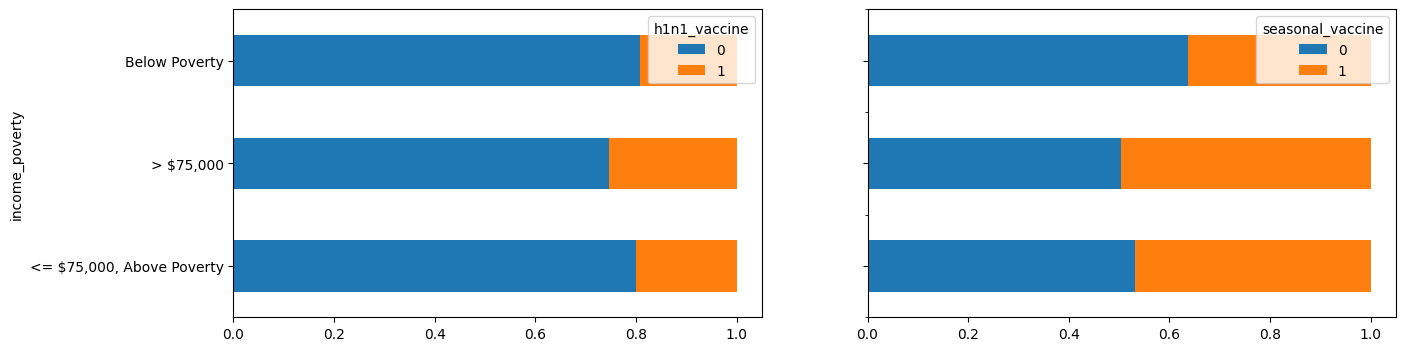

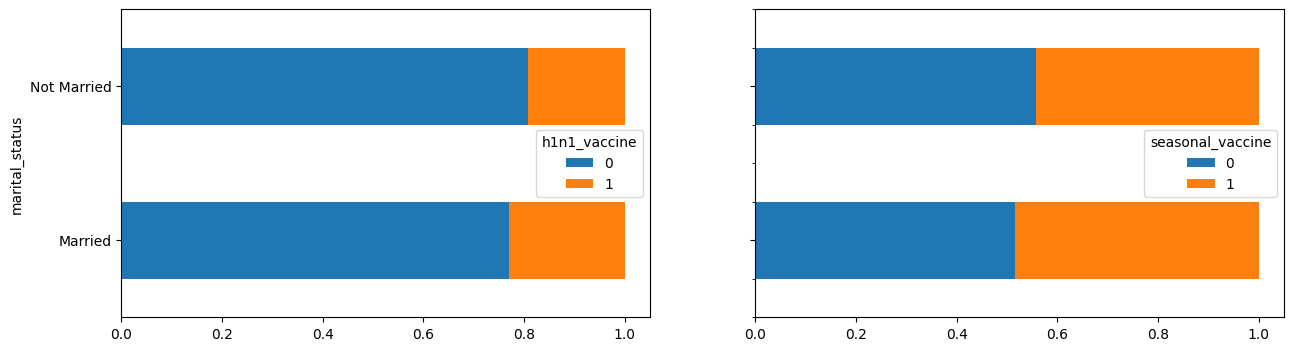

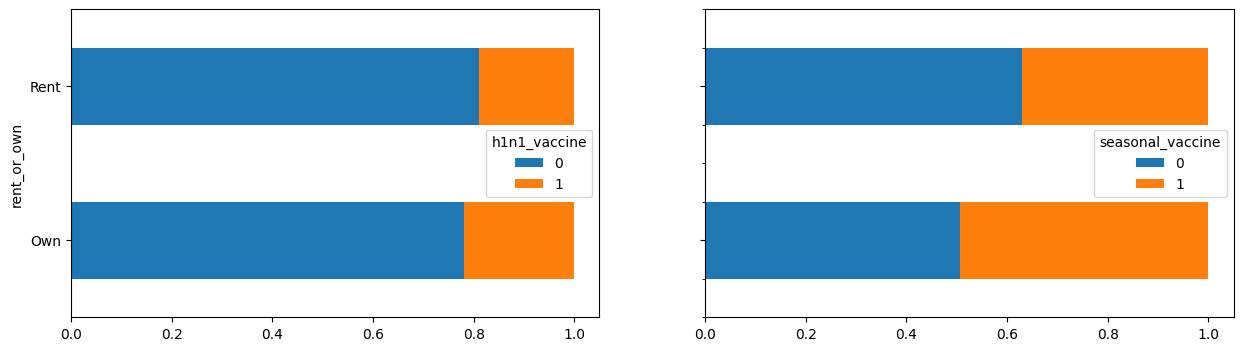

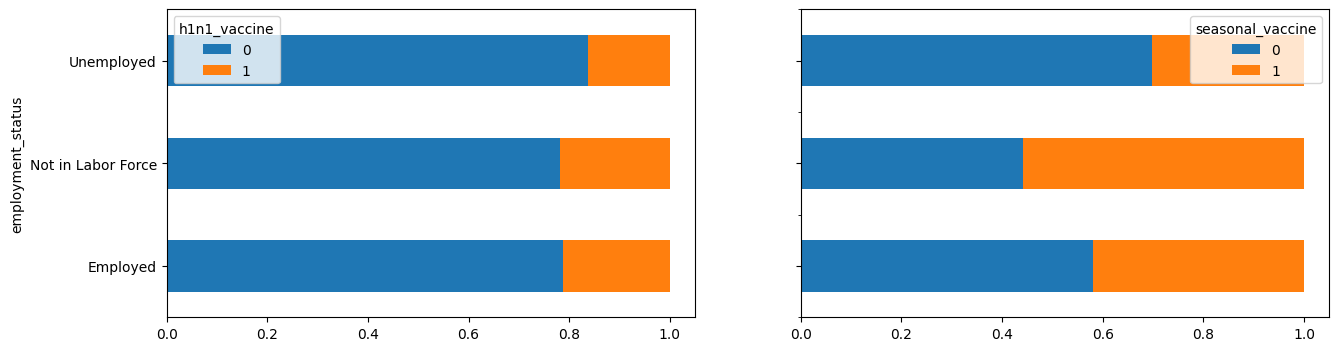

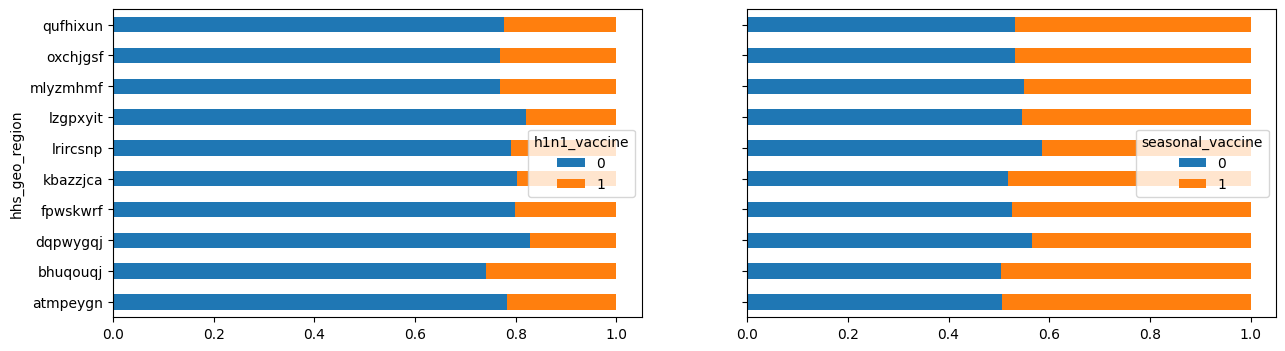

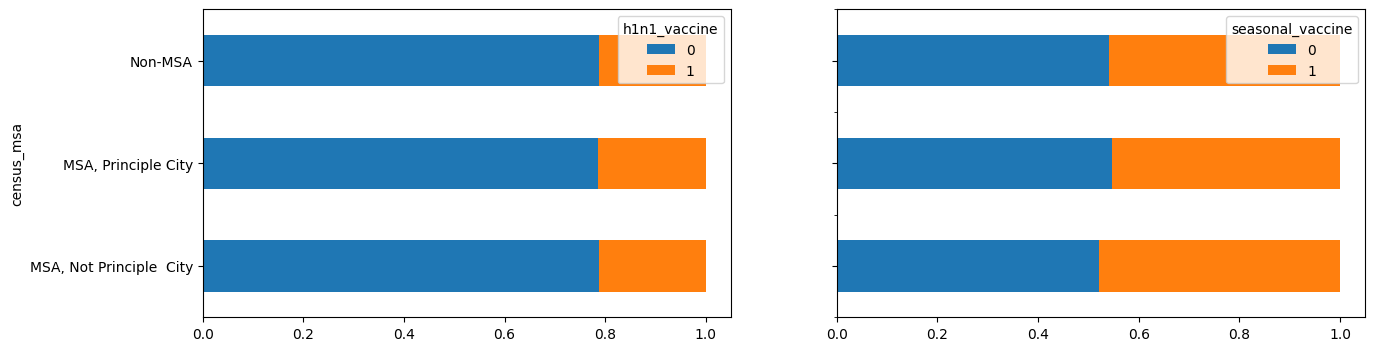

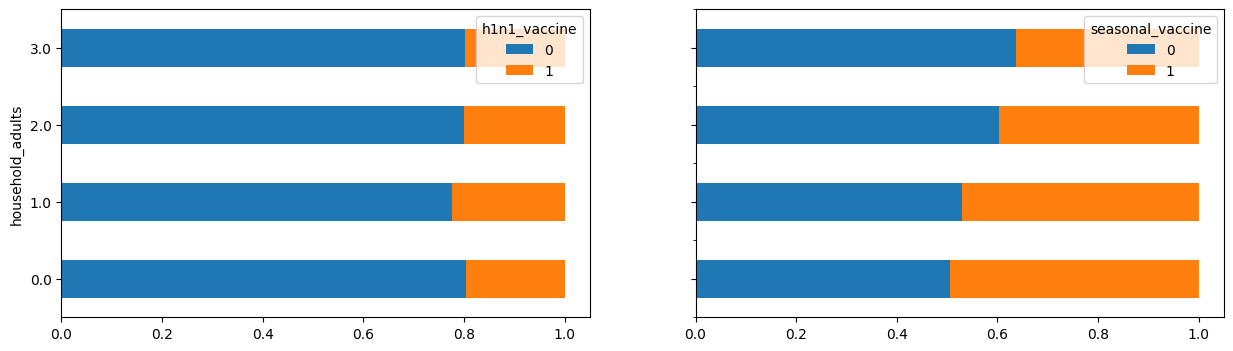

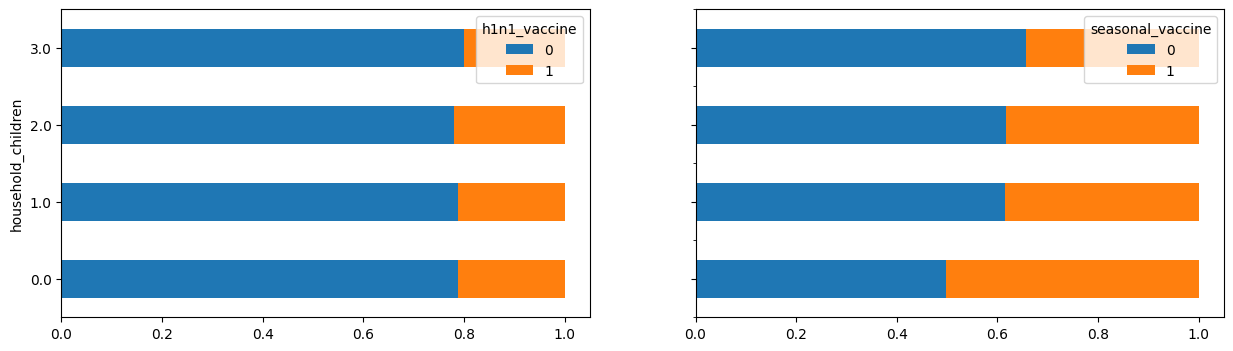

In [15]:
for col in X.columns[1:]:
    df1, df2 = count_df(col, data)
    fig = plt.figure(figsize=(15,4))
    ax1, ax2 = fig.add_subplot(1, 2, 1), fig.add_subplot(1, 2, 2)
    df1.plot(kind='barh', stacked=True, ax=ax1, sharey=True)
    df2.plot(kind='barh', stacked=True, ax=ax2)
    plt.show()

Графики выше дают примерное понимание, какие из признаков действительно зависят от предсказываемых переменных

Но отбирать важные признаки будем, основываясь на коэф. корреляции между каждой из предсказываемых переменных и предикторами. Для этого построим матрицы корреляций, однако придётся их строить отдельно для числовых и категориальных признаков, так как напрямую посчитать коэф. корреляции для категориальных признаков не получится. Придётся временно значения каждого категориального признака заменить на 0, 1, 2, ..., n-1; где n - количество уникальных значений для заданного категориального признака.

In [16]:
categorical = []
numeric = []
target_labels = ['h1n1_vaccine', 'seasonal_vaccine']
for type, col in zip(X.dtypes[1:], X.columns[1:]): # начинаем с 1-го индекса, т.к. нулевым индексом идёт respondent_id
    if type == 'object':
        categorical.append(col)
    else:
        numeric.append(col)

Матрица корреляций для числовых признаков:

<Axes: >

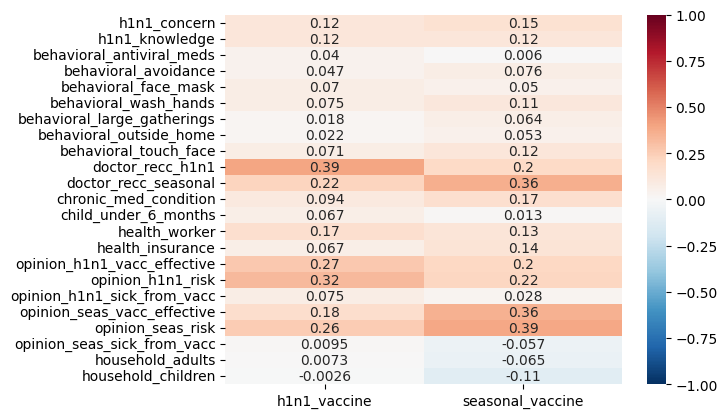

In [17]:
X_num_cor_mat = pd.concat((X[numeric], y[target_labels]), axis=1).corr()[target_labels].iloc[:-2]
sns.heatmap(X_num_cor_mat,
            vmin=-1,
            vmax=1,
            cmap='RdBu_r',
            annot=True)

Переходим от категориальных признаков к числовым (после отбора категориальных признаков вновь будем делать эмбеддинг, но по-другому)

In [18]:
X_cat = X[categorical].apply(lambda col: pd.Categorical(col).codes).replace(-1, np.nan)
X_cat

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
0,3,1,3,0,2,1,0,1,8,2
1,1,0,3,1,2,1,1,0,1,0
2,0,2,3,1,0,1,0,0,9,0
3,4,0,3,0,2,1,1,1,5,1
4,2,3,3,0,0,0,0,0,9,0
...,...,...,...,...,...,...,...,...,...,...
26702,4,3,3,0,0,1,0,1,9,2
26703,0,2,3,1,0,1,1,0,6,1
26704,3,3,3,0,0,1,0,0,6,0
26705,0,3,1,0,0,0,1,0,5,2


И строим матрицу корреляций для категориальных признаков:

<Axes: >

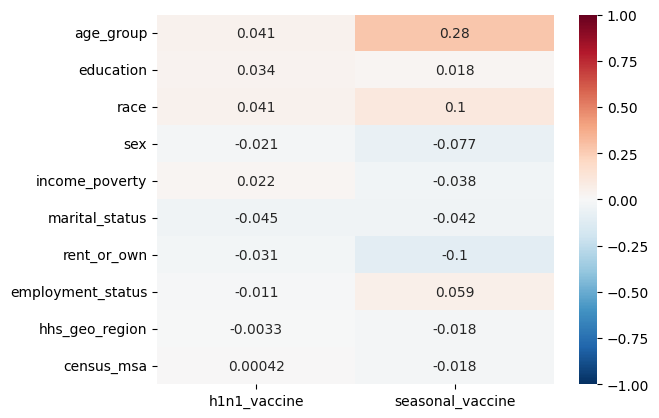

In [19]:
X_cat_cor_mat = pd.concat((X_cat, y[target_labels]), axis=1).corr()[target_labels].iloc[:-2]
sns.heatmap(X_cat_cor_mat,
            vmin=-1,
            vmax=1,
            cmap='RdBu_r',
            annot=True)

# Конструирование признаков
5. Разделите подмножество предикторов на категориальне и числовые. Проведите преобразование категориальных признаков с помощью `sklearn.preprocessing.OneHotEncoder` или других способов кодирования, если это необходимо.

`### Do not modify this cell`

Так как мы предсказываем несколько переменных, то будем для каждого из них выбирать свой набор признаков, основываясь на значении коэффициента корреляции. Будем отбирать предиктор, если его коэф. корреляции (по абсолютной величине) с предсказываемой переменной больше 10%

In [20]:
cols = {'h1n1_vaccine': [],
        'seasonal_vaccine': []}
for label in target_labels:
    cols[label] += X_num_cor_mat[np.abs(X_num_cor_mat)>0.1][label].dropna().index.to_list()
    cols[label] += X_cat_cor_mat[np.abs(X_cat_cor_mat)>0.1][label].dropna().index.to_list()

h1n1_cols = cols['h1n1_vaccine']
seas_cols = cols['seasonal_vaccine']

In [21]:
X_h1n1_train, X_h1n1_test = X_train[h1n1_cols], X_test[h1n1_cols]
X_seas_train, X_seas_test = X_train[seas_cols], X_test[seas_cols]
X_h1n1_train.head()

,h1n1_concern,h1n1_knowledge,doctor_recc_h1n1,doctor_recc_seasonal,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_seas_risk
22542,1.0,1.0,0.0,0.0,0.0,4.0,4.0,5.0,2.0
15778,1.0,2.0,0.0,0.0,0.0,5.0,2.0,5.0,4.0
15152,3.0,0.0,0.0,1.0,0.0,5.0,2.0,5.0,5.0
14690,2.0,1.0,0.0,1.0,0.0,4.0,1.0,4.0,2.0
13249,3.0,1.0,0.0,0.0,0.0,3.0,2.0,2.0,1.0


In [22]:
X_seas_train.head()

,h1n1_concern,h1n1_knowledge,behavioral_wash_hands,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_seas_risk,household_children,age_group,race,rent_or_own
22542,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,5.0,2.0,1.0,18 - 34 Years,White,Own
15778,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,2.0,5.0,4.0,1.0,45 - 54 Years,White,Own
15152,3.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,2.0,5.0,5.0,0.0,35 - 44 Years,Black,Rent
14690,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,4.0,2.0,0.0,35 - 44 Years,Black,Rent
13249,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,2.0,1.0,0.0,35 - 44 Years,White,Rent


Видно, что среди предикторов для h1n1 нет категориальных. Для сезонного гриппа попало три категориальных признака: race, age_group и rent_or_own. Последняя из них по сути бинарная, поэтому её значения заменим на 0, 1. С оставшимися двумя предикторами выполним OneHotEncoding

In [23]:
X_seas_train.loc[:, 'rent_or_own'] = X_seas_train['rent_or_own'].apply(lambda row: 1.0 if row=='Own' else 0.0)
X_seas_test.loc[:, 'rent_or_own'] = X_seas_test['rent_or_own'].apply(lambda row: 1.0 if row=='Own' else 0.0)

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
encoder = OneHotEncoder()

encoder_df_train = pd.DataFrame(encoder.fit_transform(X_seas_train[['race', 'age_group']]).toarray(), index=X_seas_train.index)
X_seas_train = X_seas_train.join(encoder_df_train).drop(columns=['race', 'age_group']).astype(float)

encoder_df_test = pd.DataFrame(encoder.transform(X_seas_test[['race', 'age_group']]).toarray(), index=X_seas_test.index)
X_seas_test = X_seas_test.join(encoder_df_test).drop(columns=['race', 'age_group']).astype(float)

In [26]:
X_seas_train.head()

,h1n1_concern,h1n1_knowledge,behavioral_wash_hands,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,opinion_h1n1_vacc_effective,...,rent_or_own,0,1,2,3,4,5,6,7,8
22542,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
15778,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
15152,3.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14690,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13249,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [27]:
X_seas_train.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_wash_hands          float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
household_children             float64
rent_or_own                    float64
0                              float64
1                              float64
2                              float64
3                              float64
4                              float64
5                              float64
6                              float64
7                              float64
8                              float64
dtype: object

P.S. заметим, что предикторы для h1n1 являются подмножеством предикторов для seasonal. Так что в дальнейшем можно будет попробовать обучить модель для предсказания h1n1 на признаках seasonal

In [28]:
set(seas_cols + h1n1_cols) == set(seas_cols)

True

In [29]:
y_h1n1_train, y_h1n1_test = y_train['h1n1_vaccine'].to_numpy(), y_test['h1n1_vaccine'].to_numpy()
y_seas_train, y_seas_test = y_train['seasonal_vaccine'].to_numpy(), y_test['seasonal_vaccine'].to_numpy()

# Бэйзлайн и продвинутые модели
6. Построение модели:
    - В качестве метрики используйте `sklearn.metrics.roc_auc_score`. (Дополнительно можете строить ROC-кривые).
    - Точность модели оцените по кросс-валидации га тренировочной выборке (можно разбивать на 5 частей) + на отложенной тестовой выборке.
    - С точки зрения площади под ROC-кривой, сравните качества:
        - Бэйзлайн модели - логистической регрессии или любого другого простого классификатора.
        - Случайного леса, обученного на предобработанном подмножестве признаков
        - Градиентного бустинга из одной (на выбор) библиотек -- [CatBoost](https://catboost.ai/), [XGBoost](https://xgboost.readthedocs.io/en/stable/),  [LightGBM](https://lightgbm.readthedocs.io/en/v3.3.2/Python-Intro.html). *Я советую начать с библиотеки Catboost --  у них хороший выбор параметров по умолчанию
        
7. Сделайте тюнинг гиперпараметров вашего алгоритма (с помощью `optuna` или любого другого фреймворка дискретной оптимизации). 

`### Do not modify this cell`

In [30]:
from sklearn.model_selection import cross_validate, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import optuna

In [31]:
X_seas_train, X_seas_test = X_seas_train.to_numpy(), X_seas_test.to_numpy()
X_h1n1_train, X_h1n1_test = X_h1n1_train.to_numpy(), X_h1n1_test.to_numpy()

Функция get_scores проводит кросс-валидацию на трэйновых данных (т.е. трэйн --> трэйн и валидацию) для двух датасетов - сезонного гриппа и свиного гриппа, вычисляет среднее значение метрики + std, а также обучает модель на тестовых данных и вычисляет метрику roc_auc на тесте.

In [32]:
def get_scores(clf,
               X_seas_train, y_seas_train, X_seas_test, y_seas_test,
               X_h1n1_train, y_h1n1_train, X_h1n1_test, y_h1n1_test):
    h1n1 = {'type': 'H1N1'}
    seas = {'type': 'Seasonal'}
    
    scores = cross_validate(clf, X_seas_train, y_seas_train,
                            scoring='roc_auc', cv=5,
                            return_train_score=True)
    seas['Mean cross-val train score'] = round(scores['train_score'].mean(), 3)
    seas['Std train score'] = round(scores['train_score'].std(), 3)
    seas['Mean cross-val validation score'] = round(scores['test_score'].mean(), 3)
    seas['Std validation score'] = round(scores['test_score'].std(), 3)
    clf.fit(X_seas_train, y_seas_train)
    y_pred = clf.predict_proba(X_seas_test)[:, 1]
    roc_seas = roc_auc_score(y_seas_test, y_pred)
    seas['Test ROC_AUC score'] = round(roc_seas, 3)

    scores = cross_validate(clf, X_h1n1_train, y_h1n1_train,
                            scoring='roc_auc', cv=5,
                            return_train_score=True)
    h1n1['Mean cross-val train score'] = round(scores['train_score'].mean(), 3)
    h1n1['Std train score'] = round(scores['train_score'].std(), 3)
    h1n1['Mean cross-val validation score'] = round(scores['test_score'].mean(), 3)
    h1n1['Std validation score'] = round(scores['test_score'].std(), 3)
    clf.fit(X_h1n1_train, y_h1n1_train)
    y_pred = clf.predict_proba(X_h1n1_test)[:, 1]
    roc_h1n1 = roc_auc_score(y_h1n1_test, y_pred)
    h1n1['Test ROC_AUC score'] = round(roc_h1n1, 3)
    return h1n1, seas, round((roc_h1n1 + roc_seas) / 2, 3)

def visualize_data(d1: dict, d2: dict, mean_roc: float):
    print(f'Mean ROC_AUC on X_test data: {mean_roc}')
    return pd.concat((pd.DataFrame(d1, index=[0]), pd.DataFrame(d2, index=[1])))

Посмотрим, какие результаты дают "сырые" модели

In [33]:
baseline_model = LogisticRegression(max_iter=15000)
visualize_data(*get_scores(baseline_model,
                           X_seas_train, y_seas_train, X_seas_test, y_seas_test,
                           X_h1n1_train, y_h1n1_train, X_h1n1_test, y_h1n1_test))

Mean ROC_AUC on X_test data: 0.838


,type,Mean cross-val train score,Std train score,Mean cross-val validation score,Std validation score,Test ROC_AUC score
0,H1N1,0.823,0.001,0.822,0.005,0.828
1,Seasonal,0.844,0.001,0.843,0.004,0.849


In [34]:
forest_clf = RandomForestClassifier()
visualize_data(*get_scores(forest_clf,
                           X_seas_train, y_seas_train, X_seas_test, y_seas_test,
                           X_h1n1_train, y_h1n1_train, X_h1n1_test, y_h1n1_test))

Mean ROC_AUC on X_test data: 0.81


,type,Mean cross-val train score,Std train score,Mean cross-val validation score,Std validation score,Test ROC_AUC score
0,H1N1,0.920,0.001,0.780,0.004,0.801
1,Seasonal,0.995,0.000,0.817,0.005,0.820


In [35]:
cat = CatBoostClassifier(silent=True)
visualize_data(*get_scores(cat,
                           X_seas_train, y_seas_train, X_seas_test, y_seas_test,
                           X_h1n1_train, y_h1n1_train, X_h1n1_test, y_h1n1_test))

Mean ROC_AUC on X_test data: 0.841


,type,Mean cross-val train score,Std train score,Mean cross-val validation score,Std validation score,Test ROC_AUC score
0,H1N1,0.874,0.002,0.816,0.005,0.831
1,Seasonal,0.906,0.001,0.843,0.004,0.851


In [36]:
xgb = XGBClassifier()
visualize_data(*get_scores(xgb,
                           X_seas_train, y_seas_train, X_seas_test, y_seas_test,
                           X_h1n1_train, y_h1n1_train, X_h1n1_test, y_h1n1_test))

Mean ROC_AUC on X_test data: 0.833


,type,Mean cross-val train score,Std train score,Mean cross-val validation score,Std validation score,Test ROC_AUC score
0,H1N1,0.879,0.002,0.810,0.005,0.826
1,Seasonal,0.925,0.001,0.829,0.003,0.841


Видно, что случайный лес явно переобучился. Остальные модели в целом показали хороший результат без признаков переобучения, однако их метрики на тестовом наборе данных (который не участвует в кросс-валидации) примерно такие же, как и у бэйзлайн модели. Попробуем покрутить гиперпараметры моделей

Для случайного леса:
- Максимальную глубину дерева
- Минимальное число объектов в листе
- Критерий ветвления
- Число деревьев

Для градиентного бустинга:
- Число деревьев
- Максимальную глубину дерева
- Learning rate
- gamma для XGBoost и l2 для CatBoost (параметры регуляризации)

Будем проводить поиск гиперпараметров с помощью TPE из optuna

## 1) Random Forest

In [37]:
def random_forest_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 90, 200)
    max_depth = trial.suggest_int('max_depth', 1, 16)
    criterion = trial.suggest_categorical('criterion', ['gini', 'log_loss', 'entropy'])
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 100)

    clf = RandomForestClassifier(max_depth=max_depth,
                                 criterion=criterion,
                                 min_samples_leaf=min_samples_leaf)
    
    mean_val_roc_auc_seas = cross_validate(clf, X_seas_train, y_seas_train, cv=5, scoring='roc_auc')['test_score'].mean()
    mean_val_roc_auc_h1n1 = cross_validate(clf, X_h1n1_train, y_h1n1_train, cv=5, scoring='roc_auc')['test_score'].mean()
    return (mean_val_roc_auc_seas + mean_val_roc_auc_h1n1) / 2

study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(), study_name='RandomForest')
study.optimize(random_forest_objective, n_trials=100, show_progress_bar=True)

[I 2024-04-29 18:47:07,470] A new study created in memory with name: RandomForest


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2024-04-29 18:47:14,641] Trial 0 finished with value: 0.8331427088235108 and parameters: {'n_estimators': 117, 'max_depth': 11, 'criterion': 'gini', 'min_samples_leaf': 81}. Best is trial 0 with value: 0.8331427088235108.
[I 2024-04-29 18:47:24,141] Trial 1 finished with value: 0.8320213914296212 and parameters: {'n_estimators': 158, 'max_depth': 12, 'criterion': 'gini', 'min_samples_leaf': 2}. Best is trial 0 with value: 0.8331427088235108.
[I 2024-04-29 18:47:32,002] Trial 2 finished with value: 0.8354707802211643 and parameters: {'n_estimators': 184, 'max_depth': 10, 'criterion': 'log_loss', 'min_samples_leaf': 28}. Best is trial 2 with value: 0.8354707802211643.
[I 2024-04-29 18:47:38,138] Trial 3 finished with value: 0.8323096354574026 and parameters: {'n_estimators': 120, 'max_depth': 6, 'criterion': 'gini', 'min_samples_leaf': 24}. Best is trial 2 with value: 0.8354707802211643.
[I 2024-04-29 18:47:41,709] Trial 4 finished with value: 0.8054845328651885 and parameters: {'n_es

In [38]:
params_forest = study.best_params

In [39]:
forest_final_clf = RandomForestClassifier(n_estimators=params_forest['n_estimators'],
                                          criterion=params_forest['criterion'],
                                          min_samples_leaf=params_forest['min_samples_leaf'],
                                          max_depth=params_forest['max_depth'])

visualize_data(*get_scores(forest_final_clf,
                           X_seas_train, y_seas_train, X_seas_test, y_seas_test,
                           X_h1n1_train, y_h1n1_train, X_h1n1_test, y_h1n1_test))

Mean ROC_AUC on X_test data: 0.845


,type,Mean cross-val train score,Std train score,Mean cross-val validation score,Std validation score,Test ROC_AUC score
0,H1N1,0.848,0.001,0.827,0.006,0.836
1,Seasonal,0.864,0.001,0.846,0.006,0.855


Качество случайного леса заметно выросло, после подбора гиперпараметров эта модель теперь не переобучается

## 2) XGBoost

In [40]:
def xgboost_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 90, 600)
    max_depth = trial.suggest_int('max_depth', 1, 16)
    gamma = trial.suggest_float('gamma', 1e-3, 1e3, log=True)
    eta = trial.suggest_float('eta', 1e-5, 1e-1, log=True)

    clf = XGBClassifier(n_estimators=n_estimators,
                        max_depth=max_depth,
                        gamma=gamma,
                        eta=eta)
    
    mean_val_roc_auc_seas = cross_validate(clf, X_seas_train, y_seas_train, cv=5, scoring='roc_auc')['test_score'].mean()
    mean_val_roc_auc_h1n1 = cross_validate(clf, X_h1n1_train, y_h1n1_train, cv=5, scoring='roc_auc')['test_score'].mean()
    return (mean_val_roc_auc_seas + mean_val_roc_auc_h1n1) / 2

study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(), study_name='XGBoost')
study.optimize(xgboost_objective, n_trials=100, show_progress_bar=True)

[I 2024-04-29 18:59:40,380] A new study created in memory with name: XGBoost


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2024-04-29 18:59:54,010] Trial 0 finished with value: 0.8323921937917804 and parameters: {'n_estimators': 582, 'max_depth': 8, 'gamma': 0.011343849870345134, 'eta': 0.003560113338093584}. Best is trial 0 with value: 0.8323921937917804.
[I 2024-04-29 18:59:56,532] Trial 1 finished with value: 0.8288515894694075 and parameters: {'n_estimators': 513, 'max_depth': 1, 'gamma': 0.553143428286164, 'eta': 0.013627632360348502}. Best is trial 0 with value: 0.8323921937917804.
[I 2024-04-29 19:00:14,478] Trial 2 finished with value: 0.815182926972509 and parameters: {'n_estimators': 304, 'max_depth': 16, 'gamma': 0.0026964530012914757, 'eta': 0.00022731281050851818}. Best is trial 0 with value: 0.8323921937917804.
[I 2024-04-29 19:00:20,982] Trial 3 finished with value: 0.823049985781043 and parameters: {'n_estimators': 514, 'max_depth': 6, 'gamma': 11.54648003762268, 'eta': 0.00030373365451045586}. Best is trial 0 with value: 0.8323921937917804.
[I 2024-04-29 19:00:22,346] Trial 4 finished w

In [41]:
params_xgb = study.best_params

In [42]:
xgb_final_clf = XGBClassifier(n_estimators=params_xgb['n_estimators'],
                              max_depth=params_xgb['max_depth'],
                              gamma=params_xgb['gamma'],
                              eta=params_xgb['eta'])
visualize_data(*get_scores(xgb_final_clf,
                           X_seas_train, y_seas_train, X_seas_test, y_seas_test,
                           X_h1n1_train, y_h1n1_train, X_h1n1_test, y_h1n1_test))

Mean ROC_AUC on X_test data: 0.846


,type,Mean cross-val train score,Std train score,Mean cross-val validation score,Std validation score,Test ROC_AUC score
0,H1N1,0.835,0.002,0.827,0.006,0.836
1,Seasonal,0.858,0.001,0.850,0.005,0.856


Качество классификации XGBoost'а тоже увеличилось

## 3) CatBoost

In [43]:
def catboost_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 90, 400)
    max_depth = trial.suggest_int('max_depth', 1, 10)
    l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 1e-3, 1e3, log=True)
    eta = trial.suggest_float('eta', 1e-5, 1e-1, log=True)

    clf = CatBoostClassifier(n_estimators=n_estimators,
                             max_depth=max_depth,
                             l2_leaf_reg=l2_leaf_reg,
                             eta=eta, silent=True)
    
    mean_val_roc_auc_seas = cross_validate(clf, X_seas_train, y_seas_train, cv=5, scoring='roc_auc')['test_score'].mean()
    mean_val_roc_auc_h1n1 = cross_validate(clf, X_h1n1_train, y_h1n1_train, cv=5, scoring='roc_auc')['test_score'].mean()
    return (mean_val_roc_auc_seas + mean_val_roc_auc_h1n1) / 2

study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(), study_name='CatBoost')
study.optimize(catboost_objective, n_trials=100, show_progress_bar=True)

[I 2024-04-29 19:05:59,536] A new study created in memory with name: CatBoost


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2024-04-29 19:06:29,895] Trial 0 finished with value: 0.8261376924674219 and parameters: {'n_estimators': 348, 'max_depth': 5, 'l2_leaf_reg': 0.9253207337691339, 'eta': 0.000556439982200887}. Best is trial 0 with value: 0.8261376924674219.
[I 2024-04-29 19:06:44,751] Trial 1 finished with value: 0.8163796907935592 and parameters: {'n_estimators': 196, 'max_depth': 6, 'l2_leaf_reg': 673.5149269749187, 'eta': 0.0005200876240265802}. Best is trial 0 with value: 0.8261376924674219.
[I 2024-04-29 19:07:05,884] Trial 2 finished with value: 0.8259003380483654 and parameters: {'n_estimators': 252, 'max_depth': 5, 'l2_leaf_reg': 0.01324566202809843, 'eta': 0.0006736828408775845}. Best is trial 0 with value: 0.8261376924674219.
[I 2024-04-29 19:07:34,679] Trial 3 finished with value: 0.8217925382238895 and parameters: {'n_estimators': 235, 'max_depth': 10, 'l2_leaf_reg': 656.4029814783112, 'eta': 9.964616893261598e-05}. Best is trial 0 with value: 0.8261376924674219.
[I 2024-04-29 19:07:42,55

In [44]:
params_cat = study.best_params

In [45]:
cat_final_clf = CatBoostClassifier(n_estimators=params_cat['n_estimators'],
                                   max_depth=params_cat['max_depth'],
                                   l2_leaf_reg=params_cat['l2_leaf_reg'],
                                   eta=params_cat['eta'], silent=True)

visualize_data(*get_scores(cat_final_clf,
                           X_seas_train, y_seas_train, X_seas_test, y_seas_test,
                           X_h1n1_train, y_h1n1_train, X_h1n1_test, y_h1n1_test))

Mean ROC_AUC on X_test data: 0.847


,type,Mean cross-val train score,Std train score,Mean cross-val validation score,Std validation score,Test ROC_AUC score
0,H1N1,0.838,0.002,0.828,0.007,0.837
1,Seasonal,0.865,0.001,0.850,0.004,0.857


В результате среди трёх ансамблевых моделей с небольшим отрывом лидирует CatBoost. Его и будем использовать для предсказания на тестовой выборке

# Предсказания на тестовой выборке и сабмит в систему

8. Сделайте предсказание на тестовой части выборки (для которой истинные значения лейблов неизвестны) и отправьте своё решение на DrivenData.org. Добавьте в ноутбук с заданием получающийся скриншот. 

Задание считается полностью засчитанным, если вы сделали сабмит в систему!

`### Do not modify this cell`

В датасете X_check (без правильных ответов) есть пропущенные значения, поэтому сначала обработаем их так же, как это делалось в начале ноутбука

In [51]:
X_check.isna().sum()

respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [52]:
X_check['income_poverty'] = X_check['income_poverty'].fillna(X_check['income_poverty'].value_counts().index[0])
X_check['health_insurance'] = X_check[['health_insurance', 'income_poverty']].apply(filler, axis=1)
X_check = X_check.drop(columns=['employment_occupation', 'employment_industry'])
X_check = X_check.fillna(X_check.mode().iloc[0])
X_check.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [53]:
X_seas_check = X_check[seas_cols]

In [54]:
X_seas_check.head()

,h1n1_concern,h1n1_knowledge,behavioral_wash_hands,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_seas_risk,household_children,age_group,race,rent_or_own
0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,5.0,1.0,0.0,35 - 44 Years,Hispanic,Rent
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,4.0,1.0,0.0,18 - 34 Years,White,Rent
2,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,5.0,4.0,0.0,55 - 64 Years,White,Own
3,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,4.0,2.0,4.0,4.0,0.0,65+ Years,White,Own
4,3.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,1.0,35 - 44 Years,Black,Own


Теперь по аналогии меняем категориальные признаки на числовые

In [55]:
X_seas_check.loc[:, 'rent_or_own'] = X_seas_check['rent_or_own'].apply(lambda row: 1.0 if row=='Own' else 0.0)
encoder_df_check = pd.DataFrame(encoder.transform(X_seas_check[['race', 'age_group']]).toarray(), index=X_seas_check.index)
X_seas_check = X_seas_check.join(encoder_df_check).drop(columns=['race', 'age_group']).astype(float)
X_seas_check

,h1n1_concern,h1n1_knowledge,behavioral_wash_hands,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,opinion_h1n1_vacc_effective,...,rent_or_own,0,1,2,3,4,5,6,7,8
0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,4.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,3.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,5.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
26704,3.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
26705,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
26706,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Финальное обучение модели для сабмита в систему будем проводить на всех тренировочных данных, которые ранее сами искусственно были разбиты на трэйн и тест

In [56]:
X_seas_train = np.concatenate((X_seas_train, X_seas_test))
X_h1n1_train = np.concatenate((X_h1n1_train, X_h1n1_test))
y_seas_train = np.concatenate((y_seas_train, y_seas_test))
y_h1n1_train = np.concatenate((y_h1n1_train, y_h1n1_test))

In [57]:
cat_final_clf.fit(X_seas_train, y_seas_train)
pred_seas = cat_final_clf.predict_proba(X_seas_check)[:, 1]

In [58]:
X_h1n1_check = X_seas_check[h1n1_cols] # ранее было показано, что h1n1_cols - подмножество seas_cols
X_h1n1_check.head()

,h1n1_concern,h1n1_knowledge,doctor_recc_h1n1,doctor_recc_seasonal,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_seas_risk
0,2.0,2.0,0.0,0.0,0.0,5.0,1.0,5.0,1.0
1,1.0,1.0,0.0,0.0,0.0,4.0,1.0,4.0,1.0
2,2.0,2.0,0.0,0.0,0.0,5.0,4.0,5.0,4.0
3,1.0,1.0,1.0,1.0,0.0,4.0,2.0,4.0,4.0
4,3.0,1.0,0.0,0.0,1.0,5.0,2.0,4.0,4.0


In [59]:
cat_final_clf.fit(X_h1n1_train, y_h1n1_train)
pred_h1n1 = cat_final_clf.predict_proba(X_h1n1_check)[:, 1]

In [61]:
submission_path = 'data/submission_format.csv'

submission = pd.read_csv(submission_path)
submission['h1n1_vaccine'] = pred_h1n1
submission['seasonal_vaccine'] = pred_seas
submission

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.122197,0.148716
1,26708,0.036219,0.034676
2,26709,0.456403,0.822960
3,26710,0.484116,0.892281
4,26711,0.392688,0.481520
...,...,...,...
26703,53410,0.402542,0.426883
26704,53411,0.150566,0.377221
26705,53412,0.155940,0.182614
26706,53413,0.062834,0.268561


In [62]:
submission.to_csv('submission.csv', index=False)

<img src='assets/submission.png' width=900>

<center><h1> Ha det bra! </h1></center>